### 2. matplotlib绘图基础

In [3]:
import numpy as np # 加载numpy模块
import matplotlib.pyplot as plt # 加载matplotlib模块
%matplotlib inline 

In [4]:
x = np.linspace(0, 2*3.1415, 100)
y = np.sin(x)

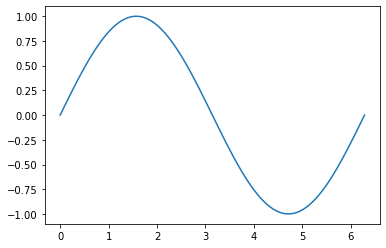

In [6]:
plt.plot(x,y)

我们还想将sin函数的最大值和最小值给标示出来，首先将这两个值计算出来，分别存到max_min_x和max_min_y中，然后在画完线图后，直接再画一个点图，使用的是scatter函数。这种通过点的位置反映两个特定数值的大小，是为了着重强调极值的位置。

In [7]:
max_min_x = np.array([3.1415/2, 3.1415 * 3/2])
max_min_y = np.sin(max_min_x)
x = np.linspace(0, 2*3.1415, 100)
y = np.sin(x)

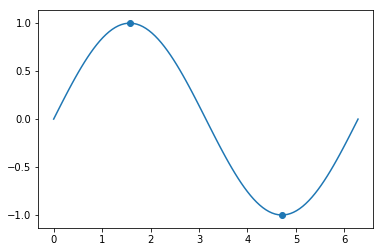

In [8]:
plt.plot(x,y);
plt.scatter(max_min_x,max_min_y);

图形可以叠加，让我们画两个函数，分别是sin和cos函数，而且用hline画了一个横线，表示横坐标轴。这里图形自动将不同的曲线用不同的颜色绘制，体现了颜色这种图形元素的用种，让我们容易区分不同曲线的变化。

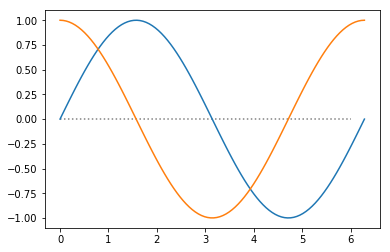

In [9]:
x = np.linspace(0, 2*3.1415, 100)
y1 = np.sin(x)
y2 = np.cos(x)
plt.plot(x,y1)
plt.plot(x,y2)
plt.hlines(0,0,6,linestyles='dotted',color = 'grey');

在上一节我们学习了如何来扔骰子，而且计算出来扔骰子点数的分布情况，下面我们来用条形图，把这个分布情况给形象的绘制出来。

In [2]:
import  numpy.random as rd
dies = rd.randint(1,7,10000)
def func_count(x):
    result = dict()
    number = np.unique(x)
    for n in number:
        result[n] = x[x == n].size
    return result

dies_output = func_count(dies)

In [11]:
print(dies_output)

{1: 1662, 2: 1639, 3: 1655, 4: 1662, 5: 1660, 6: 1722}


上面的代码和之前章节内容一样，算出了各个点数的次数，然后我们用两个列表解析把点数和对应的次数分别保存。

In [12]:
x = [k for k,v in dies_output.items()]
y = [v for k,v in dies_output.items()]

然后使用plt.bar函数，来绘制出来条状图。条状图将数字大小反映到了色块的位置和尺寸上，很容易观察到这些点数的分布，基本上是相同的，这种分布就是均匀分布。

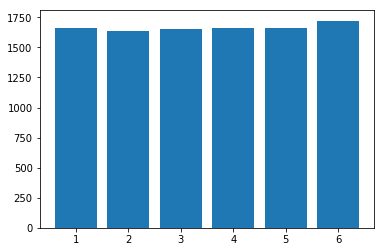

In [13]:
plt.bar(x,y);

然后我们再绘制两个骰子扔出点数之和的条状图，还是用bar来绘制，是不是很简单。这个图形和上面图形明显不一样，这里的条状图反映出两边低，中间高的钟形分布，原因我们已经在上一课讲过了，这里更能直观的感受到这一点。这种钟形分布又被称为正态分布。

In [14]:
die_1 = rd.randint(1,7,10000)
die_2 = rd.randint(1,7,10000)
die_sum = die_1 + die_2
dies_output = func_count(die_sum)
x = [k for k,v in dies_output.items()]
y = [v for k,v in dies_output.items()]

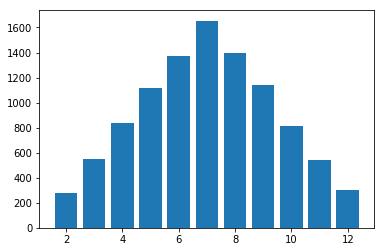

In [15]:
plt.bar(x,y);

小结：画图是为了利用人的视觉系统，用plot画线图，scatter画点图，bar画条状图。

### 3. 交互式绘图

之前学习的图形都是静态的，静态图的数据是给定的，如果我们某个数据变更一下，希望对应的图形也变更一下，这样更容易理解数据其中的规律，此次就需要交互性动态图。动态图需要另一个模块，就是ipywidgets模块。

In [3]:
import ipywidgets as widgets

In [4]:
def plot_func(freq):
    x = np.linspace(0, 2*3.1415,100)
    y = np.sin(x * freq)
    plt.plot(x, y)

我们先定义了一个sin函数的静态图绘制代码，可以看到这个代码有一个参数，就是freq，freq如果发生改变，这个图形也会发生改变，那我们就把这个freq参数做为动态图的输出参数，

In [5]:
widgets.interact(plot_func,freq=widgets.IntSlider(min=0,max=10,step=1,value=2));

interactive(children=(IntSlider(value=2, description='freq', max=10), Output()), _dom_classes=('widget-interac…

如果你用鼠标去滑动那个freq的滑块，这个参数就会发生改变，图中的sin曲线也因此发生改变。

另一个例子是类似的，不过这里是画一条斜线，斜线有两个参数决定，分别是截距和斜率，一个普通的静态图绘制所下所示。

In [7]:
def plot_lines(a,b):
    x = np.linspace(-1,1,100)
    y = a+b*x
    plt.plot(x, y)
    plt.hlines(0,-1,1,linestyles='dotted',color = 'grey')
    plt.vlines(0,-1,1,linestyles='dotted',color = 'grey')
    plt.xlim((-1,1))
    plt.ylim((-1,1))
    plt.show()

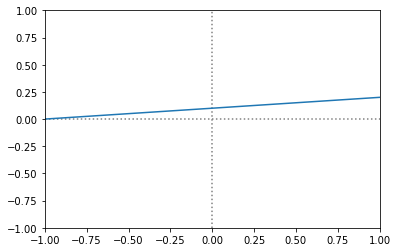

In [8]:
plot_lines(0.1,0.1)

为了让我们能交互式的绘图，可以和上面类似，定义两个可以拖动的滑块，分别代表两个参数

In [9]:
slide1 = widgets.FloatSlider(min=-1,max=1,step=0.1,value=0.1)
slide2 = widgets.FloatSlider(min=-1,max=1,step=0.1,value=0.1)
widgets.interact(plot_lines,a=slide1, b=slide2);

interactive(children=(FloatSlider(value=0.1, description='a', max=1.0, min=-1.0), FloatSlider(value=0.1, descr…

如果你用鼠标去控制a,b两个滑块，你会发现图中斜线也会不一样，让人很容易理解这两个参数的意义。

小结：交互式的数据可视化，可以让我们和图形产生互动，非常形像而容易理解。

### 练习

我们来绘制骰子扔出的点数的分布图，我们想用骰子的个数来作为输入参数，这样可以看到，当扔一个骰子和几个骰子的时候骰子分布的不同。

In [10]:
def plot_dies(n):
    dies = rd.randint(1,7,[n,10000])
    die_sum = dies.sum(0)
    dies_output = func_count(die_sum)
    x = [k for k,v in dies_output.items()]
    y = [v for k,v in dies_output.items()]
    plt.bar(x, y);

In [11]:
slider = widgets.IntSlider(min=1,max=20,step=1,value=2)
widgets.interact(plot_dies,n=slider);

interactive(children=(IntSlider(value=2, description='n', max=20, min=1), Output()), _dom_classes=('widget-int…

一个更有趣的例子是可以自动播放上面的动态图。

In [12]:
play = widgets.Play(
    value=1,
    min=0,
    max=20,
    step=1
)
slider = widgets.IntSlider(min=1,max=20,step=1,value=2)
widgets.jslink((play, 'value'), (slider, 'value'))
w = widgets.interactive(plot_dies,n=slider)
widgets.VBox([play,w])

看到那个三角形的播放按键了吧，你点一下播放，看看会有什么有趣的事情发生。

### 本课小结：
- 画图是为了利用人的视觉系统，在python中学习了使用matplotlib模块来画图
- 学习了三种图形，用plot画线图，scatter画点图，bar画条状图
- 交互式动态图可以更有效的理解数据，可以使用ipywidgets模块来完成